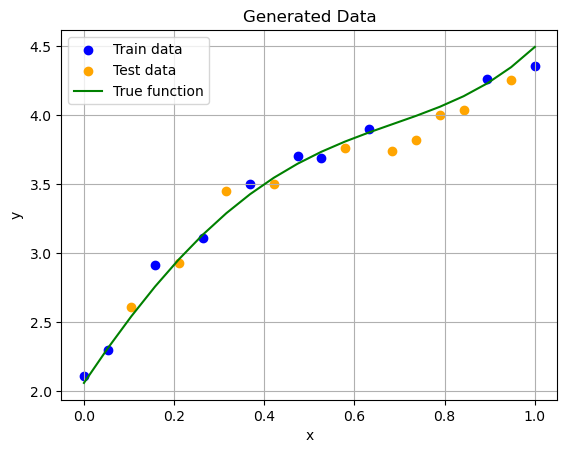

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

# 1. Выбор функции f(x)
def f(x):
    # return np.exp(2 * x - 1) + 3 * np.sin(3 * x + np.pi / 7) - np.arctan(3 * x + 6) / np.sqrt(x + 4) - 3
    return (7 * x + 2) ** (1 / 3) + np.exp(2 * x - 1) + np.sin(3 * x + np.pi / 7)

# 2. Генерация данных
np.random.seed(42)
N = 20
x = np.linspace(0, 1, N)
epsilon = np.random.normal(0, 1, N)
sigma = 0.1  # масштаб шума
y = f(x) + sigma * epsilon

# Разбиение данных на тренировочные и тестовые
train_indices = np.random.choice(range(N), size=10, replace=False)
test_indices = np.setdiff1d(range(N), train_indices)

x_train, y_train = x[train_indices], y[train_indices]
x_test, y_test = x[test_indices], y[test_indices]

# Визуализация данных
plt.scatter(x_train, y_train, color='blue', label='Train data')
plt.scatter(x_test, y_test, color='orange', label='Test data')
plt.plot(x, f(x), color='green', label='True function')
plt.title('Generated Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Промежуточный результат подготовлен, продолжим с регрессией.

Linear Regression (Exact Solution):
  Coefficients: [2.4336239  2.17805562]
  MSE Train: 0.0426, MSE Test: 0.0349

Linear Regression (Gradient Descent):
  Coefficients: [2.43362392 2.17805559]
  MSE Train: 0.0426, MSE Test: 0.0349


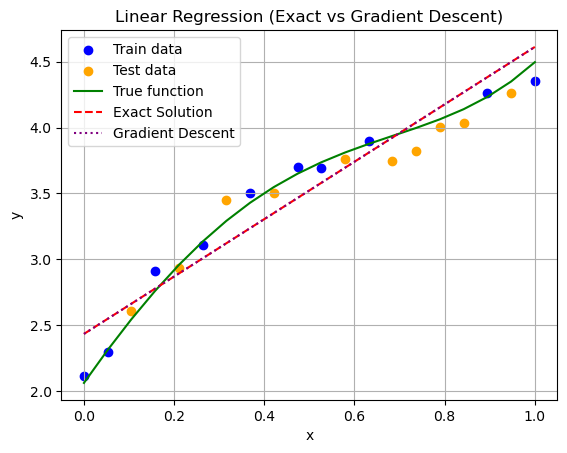

In [43]:
# 3.1. Линейная регрессия (точная формула)
# Добавляем единичный столбец для учета свободного коэффициента
X_train = np.vstack([np.ones_like(x_train), x_train]).T
X_test = np.vstack([np.ones_like(x_test), x_test]).T

# Решение уравнения (X^T X)w = X^T y
w_exact = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Предсказания и MSE для точной формулы
y_pred_train_exact = X_train @ w_exact
y_pred_test_exact = X_test @ w_exact
mse_train_exact = mean_squared_error(y_train, y_pred_train_exact)
mse_test_exact = mean_squared_error(y_test, y_pred_test_exact)

# 3.2. Линейная регрессия (градиентный спуск)
def gradient_descent(X, y, lr=0.1, epochs=1000):
    w = np.zeros(X.shape[1])
    for _ in range(epochs):
        gradient = -2 * X.T @ (y - X @ w) / len(y)
        w -= lr * gradient
    return w

w_gd = gradient_descent(X_train, y_train)

# Предсказания и MSE для градиентного спуска
y_pred_train_gd = X_train @ w_gd
y_pred_test_gd = X_test @ w_gd
mse_train_gd = mean_squared_error(y_train, y_pred_train_gd)
mse_test_gd = mean_squared_error(y_test, y_pred_test_gd)

# Вывод результатов
print("Linear Regression (Exact Solution):")
print(f"  Coefficients: {w_exact}")
print(f"  MSE Train: {mse_train_exact:.4f}, MSE Test: {mse_test_exact:.4f}")

print("\nLinear Regression (Gradient Descent):")
print(f"  Coefficients: {w_gd}")
print(f"  MSE Train: {mse_train_gd:.4f}, MSE Test: {mse_test_gd:.4f}")

# Визуализация
plt.scatter(x_train, y_train, color='blue', label='Train data')
plt.scatter(x_test, y_test, color='orange', label='Test data')
plt.plot(x, f(x), color='green', label='True function')
plt.plot(x, w_exact[0] + w_exact[1] * x, color='red', linestyle='--', label='Exact Solution')
plt.plot(x, w_gd[0] + w_gd[1] * x, color='purple', linestyle=':', label='Gradient Descent')
plt.title('Linear Regression (Exact vs Gradient Descent)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

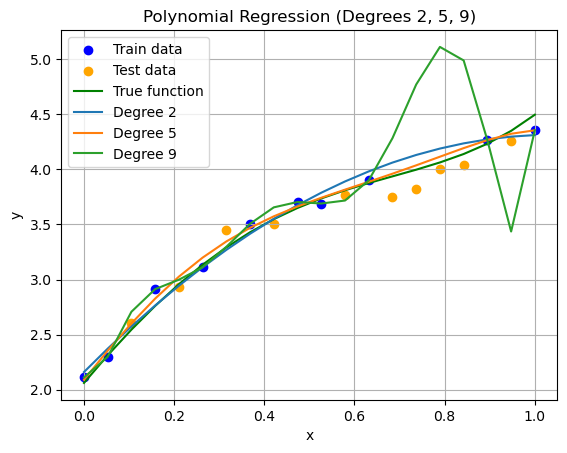

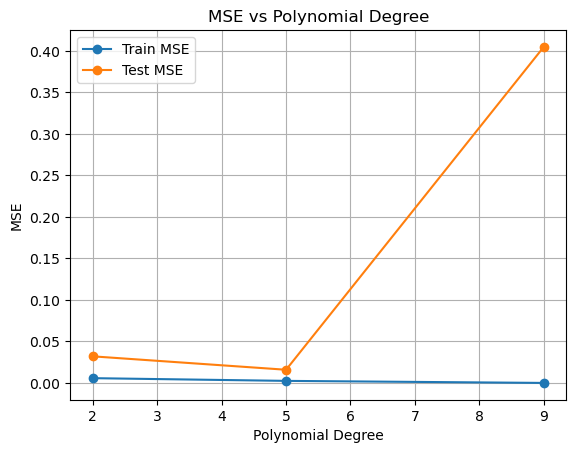

Degree 2: Train MSE = 0.0057, Test MSE = 0.0320
Degree 5: Train MSE = 0.0025, Test MSE = 0.0159
Degree 9: Train MSE = 0.0000, Test MSE = 0.4047


In [44]:
# 4. Полиномиальная регрессия (2, 5, 9 степени)
degrees = [2, 5, 9]
mse_train = []
mse_test = []

plt.scatter(x_train, y_train, color='blue', label='Train data')
plt.scatter(x_test, y_test, color='orange', label='Test data')
plt.plot(x, f(x), color='green', label='True function')

for degree in degrees:
    # Преобразование данных в полиномиальные признаки
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    X_test_poly = poly.transform(x_test.reshape(-1, 1))
    X_poly = poly.transform(x.reshape(-1, 1))
    
    # Линейная регрессия
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Предсказания
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)
    y_pred = model.predict(X_poly)
    
    # Вычисление ошибок
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred_test))
    
    # Построение графиков
    plt.plot(x, y_pred, label=f'Degree {degree}')

plt.title('Polynomial Regression (Degrees 2, 5, 9)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# График зависимости MSE от степени полинома
plt.plot(degrees, mse_train, label='Train MSE', marker='o')
plt.plot(degrees, mse_test, label='Test MSE', marker='o')
plt.title('MSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

# Вывод MSE для каждой степени
for d, train_mse, test_mse in zip(degrees, mse_train, mse_test):
    print(f"Degree {d}: Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")

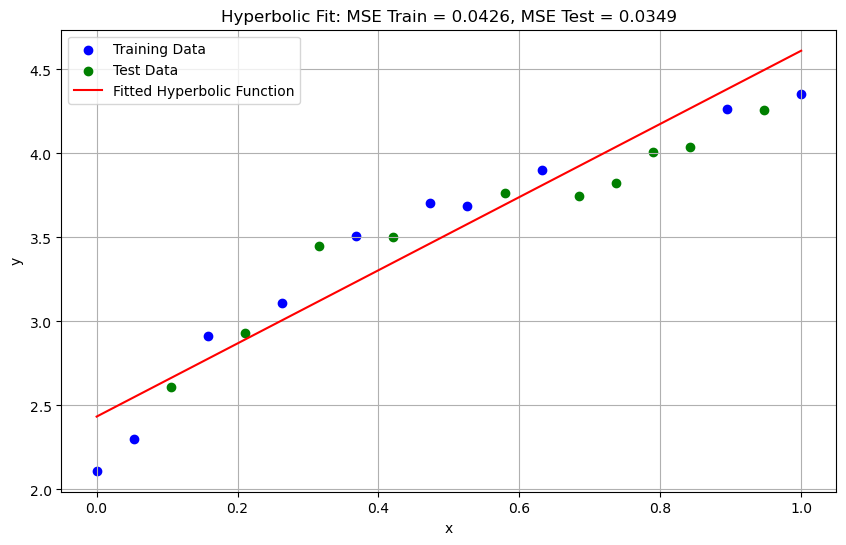

Hyperbolic Function MSE - Train: 0.042555712463954946, Test: 0.03485967888290983


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Training data (x_train, y_train) from previous tasks
# Assuming x_train and y_train are defined in the notebook
# Define a hyperbolic function from variant 5: A * sinh(b * x + c)
def hyperbolic_func(x, A, b, c):
    return A * np.sinh(b * x + c)

# Fit the hyperbolic function to the training data
popt, pcov = curve_fit(hyperbolic_func, x_train, y_train, p0=[1, 1, 1], maxfev=5000)


# Predicted values
y_pred_train = hyperbolic_func(x_train, *popt)
y_pred_test = hyperbolic_func(x_test, *popt)

# Calculate MSE for training and test sets
mse_train = np.mean((y_pred_train - y_train)**2)
mse_test = np.mean((y_pred_test - y_test)**2)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label="Training Data", color="blue")
plt.scatter(x_test, y_test, label="Test Data", color="green")
plt.plot(np.sort(x_train), hyperbolic_func(np.sort(x_train), *popt), label="Fitted Hyperbolic Function", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(f"Hyperbolic Fit: MSE Train = {mse_train:.4f}, MSE Test = {mse_test:.4f}")
plt.grid()
plt.show()

# Compare with polynomial approximation results from Task 4
print(f"Hyperbolic Function MSE - Train: {mse_train}, Test: {mse_test}")

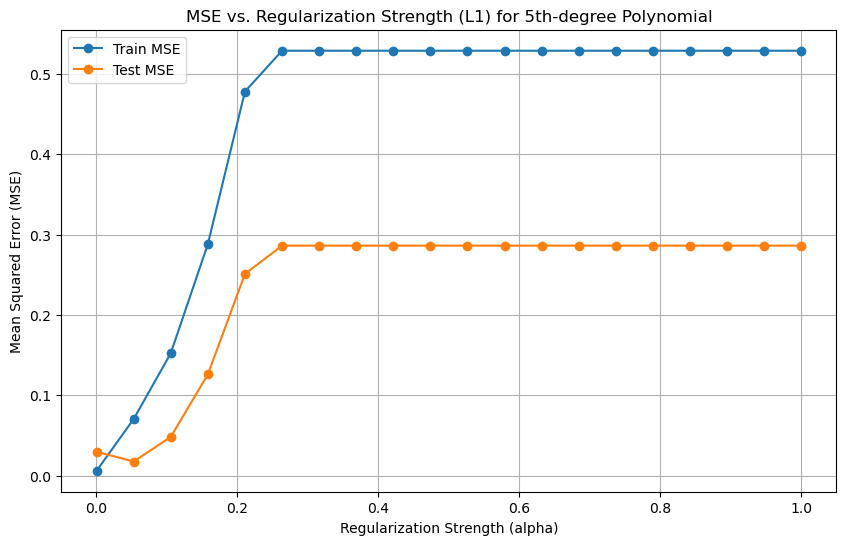

Minimum Train MSE: 0.006176757138893788 at alpha = 0.001
Minimum Test MSE: 0.017615044537869027 at alpha = 0.05357894736842105


In [46]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define range of regularization strengths (alpha values)
alphas = np.linspace(0.001, 1, 20)

# Arrays to store MSE values for train and test sets
mse_train_reg = []
mse_test_reg = []

for alpha in alphas:
    # Create a Lasso regression pipeline with 5th-degree polynomial
    model = make_pipeline(PolynomialFeatures(degree=5), Lasso(alpha=alpha, max_iter=10000))
    model.fit(x_train.reshape(-1, 1), y_train)
    
    # Predict on training and test data
    y_pred_train = model.predict(x_train.reshape(-1, 1))
    y_pred_test = model.predict(x_test.reshape(-1, 1))
    
    # Calculate MSE
    mse_train_reg.append(np.mean((y_pred_train - y_train)**2))
    mse_test_reg.append(np.mean((y_pred_test - y_test)**2))

# Plot the MSE vs. regularization strength
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train_reg, label="Train MSE", marker="o")
plt.plot(alphas, mse_test_reg, label="Test MSE", marker="o")
plt.xlabel("Regularization Strength (alpha)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Regularization Strength (L1) for 5th-degree Polynomial")
plt.legend()
plt.grid()
plt.show()

# Print minimum MSE for train and test sets
print(f"Minimum Train MSE: {min(mse_train_reg)} at alpha = {alphas[np.argmin(mse_train_reg)]}")
print(f"Minimum Test MSE: {min(mse_test_reg)} at alpha = {alphas[np.argmin(mse_test_reg)]}")